# 08.3.线性回归的从零开始实现

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))#均值为0标准差为1，num个样本，列数为w的长度
    y = torch.matmul(X, w) + b #torch.matmul是矩阵乘法  重申一位向量认为是列向量
    y += torch.normal(0,0.01,y.shape) #加上随机噪音
    return X, y.reshape((-1,1)) #-1表示自动计算，最终把y变成了一个列向量

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

`features`中的每一行都包含一个二维数据样本，`labels`中的每一行都包含一维标签值（一个标量）

In [5]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.1915, -1.3400]) 
label: tensor([9.1459])


torch.Size([1000])
torch.Size([1000, 1])


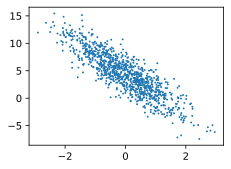

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1);
"""
detach分离出数值，不再含有梯度
在pytorch的一些版本里面要先detach才能使用.numpy将tensor转化为numpy数组
"""
print(features[:,1].shape)
print(labels.shape)

定义一个`data_iter`函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为`batch_size`的小批量

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
    yield features[batch_size], labels[batch_size]
batch_size = 10
